In [22]:
# Model building
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime, codecs, json

from tensorflow_hub import KerasLayer
from keras import Sequential
from keras.utils import plot_model as pltmdl
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import History

# Data Preparations
import urllib, zipfile, os
from keras.preprocessing.image import ImageDataGenerator as IDG


In [20]:
class MachineLearning:
  def __init__(self):
    self.evaluations = self.evaluations()
    self.evaluations.comparison_plot = self.evaluations.comparison_plot()
    self.callbacks = self.callbacks()
    self.model = self.model()
#------------------------------------------------------------------------------
  class evaluations:
    class comparison_plot:
      def main(self, history, spe = "all", plot_style = "-", plot_title = "Summary Plot"):
        return pd.DataFrame(history.history if spe == "all"
                      else history.history[spe]).plot(style = plot_style, title = plot_title)
#------------------------------------------------------------------------------
      def sub(self, history, plot, spe = "all", plot_style = "-"):
        return pd.DataFrame(history.history if spe == "all"
              else history.history[spe]).plot(ax = plot, style = plot_style)
#------------------------------------------------------------------------------
    def history_plot(self, history:History or str, save_path:str = None, name:str = "History_Plot",
                     specifications:str = "all", grid:bool = False, figsize:tuple = (10, 7), scatter_node:bool = None
                     ):
      """Display Data From History(tf.keras.callbacks.history or library) specificationscifically or all the data present

      Args:
          history (History or str): History object or library saved history
          save_path (str, optional): Directory to save. Defaults to None.
          name (str, optional): Name of the file. Defaults to "History_Plot".
          specifications (str, optional): Specifications of data to be displayed in the plot. Defaults to "all".
          grid (bool, optional): Enables Grid. Defaults to False.
          figsize (tuple, optional): Set Figsize. Defaults to (10, 7).
          scatter_node (bool, optional): Enables Nodes. Defaults to None.
      """
      
      name = name.replace(" ", "_")
      epochs = range(len(history.history["loss"]))
      node = "-" if not scatter_node else "o-"
      
      plt.figure(figsize = figsize)
      
      if specifications == "all":
        pd.DataFrame(history.history).plot(style = node)
        if save_path:
          self.__save(name, save_path)
      
      elif specifications == "val_loss_loss":
        plt.plot(epochs, history.history["loss"], label = "Training Loss", style = node)
        plt.plot(epochs, history.history["val_loss"], label = "Validation Loss", style = node)
        plt.title("Training Loss vs Validation Loss")
        if save_path:
          self.__save(f"{name}_tloss_vloss", save_path)
      
      elif specifications == "val_accuracy_accuracy":
        plt.plot(epochs, history.history["accuracy"], label = "Training Accuracy", style = node)
        plt.plot(epochs, history.history["val_accuracy"], label = "Validation Accuracy", style = node)
        plt.title("Training Accuracy vs Validation Accuracy")
        if save_path:
          self.__save(f"{name}_taccuracy_vaccuracy", save_path)
      
      elif "loss" == specifications:
        pd.DataFrame(history.history["loss"]).plot(style = node)
        plt.title("Training Loss")
        if save_path:
          self.__save(f"{name}_loss", save_path)
          
      elif "val_loss" == specifications:
        pd.DataFrame(history.history["val_loss"]).plot(style = node)
        plt.title("Validation Loss")
        if save_path:
          self.__save(f"{name}_val_loss", save_path)
              
      elif "val_accuracy" == specifications:
        pd.DataFrame(history.history["val_accuracy"]).plot(style = node)
        plt.title("Validation Accuracy")
        if save_path:
          self.__save(f"{name}_val_accuracy", save_path)
          
      elif "accuracy" == specifications:
        pd.DataFrame(history.history["accuracy"]).plot(style = node)
        plt.title("Training Accuracy")
        if save_path:
          self.__save(f"{name}_accuracy", save_path)

      elif "lr" == specifications:
        pd.DataFrame(history.history["lr"]).plot(style = node)
        plt.title("Learning Rate")
        if save_path:
          self.__save(f"{name}_learning_rate", save_path)
          
      else:
        print('specifications available values: "all", "val_loss_loss", "val_accuracy_accuracy", val_loss, loss, accuracy, val_accuracy, "lr"')
        return

      plt.legend()
      plt.grid(grid)
      plt.show()
#------------------------------------------------------------------------------
    def __save(self, name, path):
      plt.xlabel("epochs")
      plt.title(name.replace("_", " "))
      plt.grid()
#------------------------------------------------------------------------------
      os.makedirs(path, exist_ok = True)
      plt.savefig(f"{path}{name}.png")
      return f"{name} is saved in {path}"
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
  class callbacks:
    def tensorboard_callback(self, dir_name:str, experiment_name:str):
      log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +"_log"
      tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
      print(f"Saving Tensorboard Log Files to: {log_dir}")
      return tensorboard_callback
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
  class model:
    def create_model(self, model_url:str, num_classes:int, image_shape:tuple = (224, 224, 3), model_name:str = "model"):
      feature_extractor_layer = KerasLayer(model_url,
                                              trainable = False,
                                              input_shape = image_shape,
                                              name = "feature_extracted")
      model = Sequential([
        feature_extractor_layer,
        Dense(num_classes,
              activation = "softmax",
              name = "output_layer")
      ], name = model_name)
      return model
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
  class save_load:
    def save(model = None, history = None, path = "./", name = "model"):
      """Save The Model with h5 and/or History with json
      
      save(model = None, 
        history = None, 
        path = None, 
        name = "model")

      Args:
          model (tf.keras.models): compiled model. Default to None
          history (tf.keras.models.history, optional): history data. Defaults to None.
          path (directory, optional): directory path from the working directory. Defaults to "./", means working directory.
          name (str, optional): name to be saved. Defaults to "model".

      Returns:
          str: reports back the directory it was saved
      """
      dir_name_m = f"{name}.h5"
      dir_name_d = f"{name}_diagram.png"
      dir_name_h = f"{name}_history.json"
      new_hist = {}
      
      # saving the model with h5 format
      if path:
        os.makedirs(path, exist_ok = True)
        dir_name_m = path + dir_name_m
        dir_name_d = path + dir_name_d
        dir_name_h = path + dir_name_h
      
      model.save(dir_name_m)
      
      # saving the history
      if history:
        for key in list(history.history.keys()):
          new_hist[key]=history.history[key]
          if type(history.history[key]) == np.ndarray:
            new_hist[key] = history.history[key].tolist()
          elif type(history.history[key]) == list:
            if  type(history.history[key][0]) == np.float64:
              new_hist[key] = list(map(float, history.history[key]))
            if  type(history.history[key][0]) == np.float32:
              new_hist[key] = list(map(float, history.history[key]))
              
        with codecs.open(dir_name_h, 'w', encoding='utf-8') as file:
            json.dump(new_hist, file, separators=(',', ':'), sort_keys=True, indent=4)
        
      # saving the diagram
      if model:
        pltmdl(model = model, 
              show_shapes = True, 
              show_layer_activations = True, 
              to_file = dir_name_d)
      
      if path or model:
        return f"Model, History and Diagram are saved: {path}"

    def load(history_path = None, model_path = None):
      """load model.h5 file and/or history.json file
      
      load(history_path = None, 
        model_path = None)

      Args:
          history_path (directory, optional): model.h5 file directory. Defaults to None.
          model_path (directory, optional): history.json file directory. Defaults to None.

      Returns:
          tensor, and/or model: tensor from history.json, and/or model from model.h5
      """
      if history_path:
        with codecs.open(history_path, 'r', encoding='utf-8') as file:
          h = json.loads(file.read())
      
      if model_path:
        m = tf.keras.models.load_model(model_path)
      
      if history_path and model_path:
        return h, m
      elif model_path:
        return m
      else:
        return h
#------------------------------------------------------------------------------
ml = MachineLearning()

# Note

Transfer Learning - Use Working Model and Build from it

Advantages:
1. Can use existing Architecture that work
2. Can adapt the patterns to self data

***
## Callbacks are etra functionality you can add to the models to be performed before or after training.

- Tracking Experiment with the TensorBoard callback
- Model checkpoint with the ModelCheckpoint callback
- Stopping a model from training. EarlyStopping callback
***
## Tensorflow Hub
- Website Collection for the Tensorflow Models
https://tfhub.dev/

## Papers with Code
- Collects data about models
https://paperswithcode.com/


# Coding

## File Downloading

In [9]:
urllib.request.urlretrieve("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip", "./resources/10_food_classes_10_percent.zip")

zip_ref = zipfile.ZipFile("./resources/10_food_classes_10_percent.zip")
zip_ref.extractall("./resources/")
zip_ref.close()

## Data Checking

In [4]:
for dirpath, dirnames, filenames in os.walk("./resources/10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 2 directories and 0 files in ./resources/10_food_classes_10_percent
There are 10 directories and 0 files in ./resources/10_food_classes_10_percent\test
There are 0 directories and 250 files in ./resources/10_food_classes_10_percent\test\chicken_curry
There are 0 directories and 250 files in ./resources/10_food_classes_10_percent\test\chicken_wings
There are 0 directories and 250 files in ./resources/10_food_classes_10_percent\test\fried_rice
There are 0 directories and 250 files in ./resources/10_food_classes_10_percent\test\grilled_salmon
There are 0 directories and 250 files in ./resources/10_food_classes_10_percent\test\hamburger
There are 0 directories and 250 files in ./resources/10_food_classes_10_percent\test\ice_cream
There are 0 directories and 250 files in ./resources/10_food_classes_10_percent\test\pizza
There are 0 directories and 250 files in ./resources/10_food_classes_10_percent\test\ramen
There are 0 directories and 250 files in ./resources/10_food_classes_10_

## Data Preprocessing

In [5]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "./resources/10_food_classes_10_percent/train/"
test_dir = "./resources/10_food_classes_10_percent/test/"

train_datagen = IDG(rescale=1./255)
test_datagen = IDG(rescale=1./255)

print("Training Images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size = IMAGE_SHAPE,
                                                          batch_size = BATCH_SIZE,
                                                          class_mode = "categorical")
print("Test Images:")
test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                                        target_size = IMAGE_SHAPE,
                                                        batch_size = BATCH_SIZE,
                                                        class_mode = "categorical")

Training Images:
Found 750 images belonging to 10 classes.
Test Images:
Found 2500 images belonging to 10 classes.


## Callbacks

### TensorBoard Callback

In [ ]:
def create_tensorboard_callback(dir_name:str, experiment_name:str):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +"_log"
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving Tensorboard Log Files to: {log_dir}")
  return tensorboard_callback

## Using A Model from the TensorHub

In [14]:
def create_model(model_url:str, num_classes:int, image_shape:tuple = (224, 224, 3)):
  feature_extractor_layer = KerasLayer(model_url,
                                          trainable = False,
                                          input_shape = image_shape,
                                          name = "feature_extracted")
  
  model = Sequential([
    feature_extractor_layer,
    Dense(num_classes,
          activation = "softmax",
          name = "output_layer")
  ])
  
  return model

### EfficientNet B0
https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

In [8]:
efficientnet_b0_model = ml.model.create_model("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1", 
                               train_data_10_percent.num_classes)
efficientnet_b0_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extracted (KerasLay  (None, 1280)             4049564   
 er)                                                             
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [9]:
efficientnet_b0_model.compile(
  loss = "categorical_crossentropy",
  optimizer = Adam(),
  metrics = ["accuracy"]
)

efficientnet_b0_model_h = efficientnet_b0_model.fit(train_data_10_percent, epochs = 10,
                                                    steps_per_epoch = len(train_data_10_percent.filenames) // BATCH_SIZE,
                                                    validation_data = test_data_10_percent,
                                                    validation_steps = len(test_data_10_percent.filenames) // BATCH_SIZE,
                                                    callbacks = [ml.callbacks.tensorboard_callback("./log/TLE/efficientnet", "efficientnet_b0")])

Saving Tensorboard Log Files to: ./log/TLE/efficientnet/efficientnet_b0/20220814-181113_log
Epoch 1/10
23/23 [==============================] - 168s 6s/step - loss: 1.8552 - accuracy: 0.4443 - val_loss: 1.3264 - val_accuracy: 0.7360
Epoch 2/10
23/23 [==============================] - 119s 5s/step - loss: 1.0720 - accuracy: 0.7716 - val_loss: 0.8783 - val_accuracy: 0.8237
Epoch 3/10
23/23 [==============================] - 131s 6s/step - loss: 0.7702 - accuracy: 0.8315 - val_loss: 0.7019 - val_accuracy: 0.8478
Epoch 4/10
23/23 [==============================] - 128s 6s/step - loss: 0.6273 - accuracy: 0.8663 - val_loss: 0.6143 - val_accuracy: 0.8546
Epoch 5/10
23/23 [==============================] - 128s 6s/step - loss: 0.5205 - accuracy: 0.8997 - val_loss: 0.5625 - val_accuracy: 0.8614
Epoch 6/10
23/23 [==============================] - 131s 6s/step - loss: 0.4559 - accuracy: 0.9109 - val_loss: 0.5251 - val_accuracy: 0.8658
Epoch 7/10
23/23 [==============================] - 125s 6s/st

<Figure size 720x504 with 0 Axes>

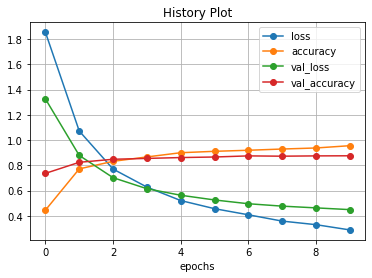

In [11]:
ml.evaluations.history_plot(efficientnet_b0_model_h, grid=True, scatter_node=True,
                            save_path = "./saved_files/TL_FE/Activity_1/efficientnet_b0/",
                            name = "History Plot")

In [23]:
ml.save_load.save(efficientnet_b0_model, efficientnet_b0_model_h,
                  "./saved_files/TL_FE/Activity_1/efficientnet_b0/",)

'Model, History and Diagram are saved: ./saved_files/TL_FE/Activity_1/efficientnet_b0/'

### Resnet V2 50
https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5

In [12]:
resnet_model = ml.model.create_model("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/1",
                                     train_data_10_percent.num_classes)
resnet_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extracted (KerasLay  (None, 2048)             23564800  
 er)                                                             
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [13]:
resnet_model.compile(
  loss = "categorical_crossentropy",
  optimizer = Adam(),
  metrics = ["accuracy"]
)

resnet_model_h = resnet_model.fit(train_data_10_percent, epochs = 10,
                                  steps_per_epoch = len(train_data_10_percent.filenames) // BATCH_SIZE,
                                  validation_data = test_data_10_percent,
                                  validation_steps = len(test_data_10_percent.filenames) // BATCH_SIZE,
                                  callbacks = [ml.callbacks.tensorboard_callback("./log/TLE", "resnet_50")])

Saving Tensorboard Log Files to: ./log/TLE/resnet_50/20220814-183853_log
Epoch 1/10
23/23 [==============================] - 297s 13s/step - loss: 2.0999 - accuracy: 0.3008 - val_loss: 1.2955 - val_accuracy: 0.5905
Epoch 2/10
23/23 [==============================] - 295s 13s/step - loss: 0.9814 - accuracy: 0.6992 - val_loss: 0.9051 - val_accuracy: 0.7119
Epoch 3/10
23/23 [==============================] - 292s 13s/step - loss: 0.6527 - accuracy: 0.8134 - val_loss: 0.7864 - val_accuracy: 0.7360
Epoch 4/10
23/23 [==============================] - 283s 13s/step - loss: 0.5052 - accuracy: 0.8649 - val_loss: 0.7224 - val_accuracy: 0.7680
Epoch 5/10
23/23 [==============================] - 268s 12s/step - loss: 0.4037 - accuracy: 0.8983 - val_loss: 0.6868 - val_accuracy: 0.7736
Epoch 6/10
23/23 [==============================] - 269s 12s/step - loss: 0.3418 - accuracy: 0.9318 - val_loss: 0.6667 - val_accuracy: 0.7760
Epoch 7/10
23/23 [==============================] - 273s 12s/step - loss: 0

<Figure size 720x504 with 0 Axes>

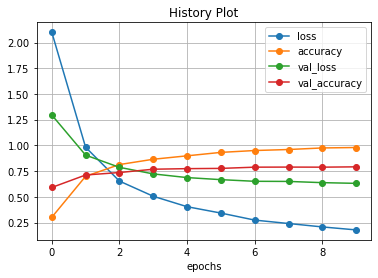

In [14]:
ml.evaluations.history_plot(resnet_model_h, grid=True, scatter_node=True,
                            save_path = "./saved_files/TL_FE/Activity_1/resnet_50/",
                            name = "History Plot")

In [24]:
ml.save_load.save(resnet_model, resnet_model_h,
                  "./saved_files/TL_FE/Activity_1/resnet_50/",)

'Model, History and Diagram are saved: ./saved_files/TL_FE/Activity_1/resnet_50/'

### Summary Resnet vs EfficientNet

<Figure size 2160x2160 with 0 Axes>

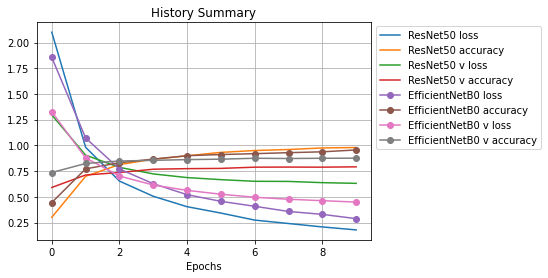

In [15]:
title = "History Summary"
dir = "./saved_files/TL_FE/Activity_1/Summary/"

plt.figure(figsize = (30, 30))
plot = ml.evaluations.comparison_plot.main(resnet_model_h,  plot_title = title)
plot = ml.evaluations.comparison_plot.sub(efficientnet_b0_model_h, plot, plot_style = "o-")
plt.legend(["ResNet50 loss", "ResNet50 accuracy",
            "ResNet50 v loss", "ResNet50 v accuracy",
            "EfficientNetB0 loss", "EfficientNetB0 accuracy",
            "EfficientNetB0 v loss", "EfficientNetB0 v accuracy",],
           loc='center left', bbox_to_anchor = (1, 0.7))
plt.xlabel("Epochs")
plt.grid(True)
os.makedirs(dir, exist_ok = True)
plt.savefig(f"{dir}{title}.png")

<Figure size 2160x2160 with 0 Axes>

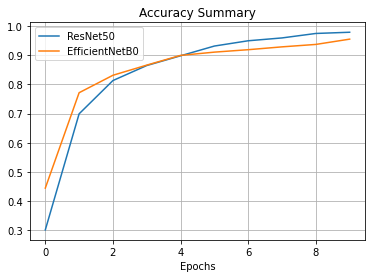

In [16]:
title = "Accuracy Summary"
dir = "./saved_files/TL_FE/Activity_1/Summary/"

plt.figure(figsize = (30, 30))
plot = ml.evaluations.comparison_plot.main(resnet_model_h, spe = "accuracy", plot_title = title)
plot = ml.evaluations.comparison_plot.sub(efficientnet_b0_model_h, plot, spe = "accuracy",)
plt.legend(["ResNet50", "EfficientNetB0"])
plt.xlabel("Epochs")
plt.grid(True)
os.makedirs(dir, exist_ok = True)
plt.savefig(f"{dir}{title}.png")

<Figure size 2160x2160 with 0 Axes>

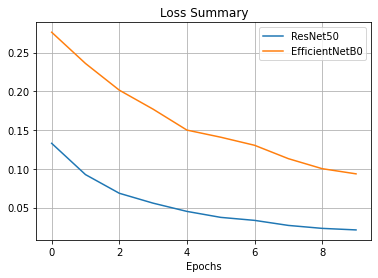

In [97]:
title = "Loss Summary"
dir = "./saved_files/TL_FE/Activity_1/Summary/"

plt.figure(figsize = (30, 30))
plot = ml.evaluations.comparison_plot.main(resnet_model_h, spe = "loss", plot_title = title)
plot = ml.evaluations.comparison_plot.sub(efficientnet_b0_model_h, plot, spe = "loss",)
plt.legend(["ResNet50", "EfficientNetB0"])
plt.xlabel("Epochs")
plt.grid(True)
os.makedirs(dir, exist_ok = True)
plt.savefig(f"{dir}{title}.png")

<Figure size 2160x2160 with 0 Axes>

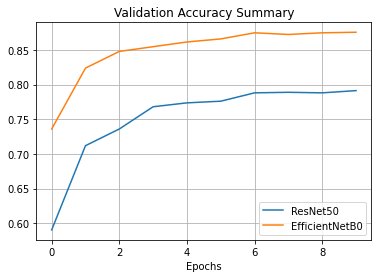

In [17]:
title = "Validation Accuracy Summary"
dir = "./saved_files/TL_FE/Activity_1/Summary/"

plt.figure(figsize = (30, 30))
plot = ml.evaluations.comparison_plot.main(resnet_model_h, spe = "val_accuracy", plot_title = title)
plot = ml.evaluations.comparison_plot.sub(efficientnet_b0_model_h, plot, spe = "val_accuracy",)
plt.legend(["ResNet50", "EfficientNetB0"])
plt.xlabel("Epochs")
plt.grid(True)
os.makedirs(dir, exist_ok = True)
plt.savefig(f"{dir}{title}.png")

<Figure size 2160x2160 with 0 Axes>

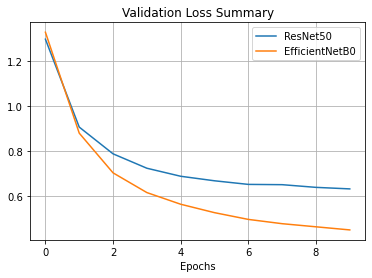

In [18]:
title = "Validation Loss Summary"
dir = "./saved_files/TL_FE/Activity_1/Summary/"

plt.figure(figsize = (30, 30))
plot = ml.evaluations.comparison_plot.main(resnet_model_h, spe = "val_loss", plot_title = title)
plot = ml.evaluations.comparison_plot.sub(efficientnet_b0_model_h, plot, spe = "val_loss",)
plt.legend(["ResNet50", "EfficientNetB0"])
plt.xlabel("Epochs")
plt.grid(True)
os.makedirs(dir, exist_ok = True)
plt.savefig(f"{dir}{title}.png")

## Tensorboard
https://tensorboard.dev/
Don't upload private experiments to tensorboard.dev

In [9]:
# use this in activated environment in cmd
# python -m tensorboard.main --logdir {directory of tensorboard data} --bind_all
# example: python -m tensorboard.main --logdir log/TLE/efficientnet_b0/ --bind_all

^C


#### Tensorboard Problem Solving

In [2]:
%load_ext tensorboard

In [2]:
%pip show tensorboard

Name: tensorboard
Version: 2.9.1
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: d:\codes\tensorflow\zero-to-mastery\z2m\lib\site-packages
Requires: absl-py, google-auth, google-auth-oauthlib, grpcio, markdown, numpy, protobuf, requests, setuptools, tensorboard-data-server, tensorboard-plugin-wit, werkzeug, wheel
Required-by: tensorflow, tensorflow-gpu
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Copyright 2019 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Self-diagnosis script for TensorBoard.

Instructions: Save this script to your local machine, then execute it in
the same environment (virtualenv, Conda, etc.) from which you normally
run TensorBoard. Read the output and follow the directions.
"""


# This script may only depend on the Python standard library. It is not
# built with Bazel and should not assume any third-party dependencies.
import collections
import errno
import functools
import hashlib
import inspect
import logging
import os
import pipes
import shlex
import socket
import subprocess
import sys
import tempfile
import textwrap
import traceback


# A *check* is a function (of no arguments) that performs a diagnostic,
# writes log messages, and optionally yields suggestions. Each check
# runs in isolation; exceptions will be caught and reported.
CHECKS = []


# A suggestion to the end user.
#   headline (str): A short description, like "Turn it off and on
#     again". Should be imperative with no trailing punctuation. May
#     contain inline Markdown.
#   description (str): A full enumeration of the steps that the user
#     should take to accept the suggestion. Within this string, prose
#     should be formatted with `reflow`. May contain Markdown.
Suggestion = collections.namedtuple("Suggestion", ("headline", "description"))


def check(fn):
    """Decorator to register a function as a check.

    Checks are run in the order in which they are registered.

    Args:
      fn: A function that takes no arguments and either returns `None` or
        returns a generator of `Suggestion`s. (The ability to return
        `None` is to work around the awkwardness of defining empty
        generator functions in Python.)

    Returns:
      A wrapped version of `fn` that returns a generator of `Suggestion`s.
    """

    @functools.wraps(fn)
    def wrapper():
        result = fn()
        return iter(()) if result is None else result

    CHECKS.append(wrapper)
    return wrapper


def reflow(paragraph):
    return textwrap.fill(textwrap.dedent(paragraph).strip())


def pip(args):
    """Invoke command-line Pip with the specified args.

    Returns:
      A bytestring containing the output of Pip.
    """
    # Suppress the Python 2.7 deprecation warning.
    PYTHONWARNINGS_KEY = "PYTHONWARNINGS"
    old_pythonwarnings = os.environ.get(PYTHONWARNINGS_KEY)
    new_pythonwarnings = "%s%s" % (
        "ignore:DEPRECATION",
        ",%s" % old_pythonwarnings if old_pythonwarnings else "",
    )
    command = [sys.executable, "-m", "pip", "--disable-pip-version-check"]
    command.extend(args)
    try:
        os.environ[PYTHONWARNINGS_KEY] = new_pythonwarnings
        return subprocess.check_output(command)
    finally:
        if old_pythonwarnings is None:
            del os.environ[PYTHONWARNINGS_KEY]
        else:
            os.environ[PYTHONWARNINGS_KEY] = old_pythonwarnings


def which(name):
    """Return the path to a binary, or `None` if it's not on the path.

    Returns:
      A bytestring.
    """
    binary = "where" if os.name == "nt" else "which"
    try:
        return subprocess.check_output([binary, name])
    except subprocess.CalledProcessError:
        return None


def sgetattr(attr, default):
    """Get an attribute off the `socket` module, or use a default."""
    sentinel = object()
    result = getattr(socket, attr, sentinel)
    if result is sentinel:
        print("socket.%s does not exist" % attr)
        return default
    else:
        print("socket.%s = %r" % (attr, result))
        return result


@check
def autoidentify():
    """Print the Git hash of this version of `diagnose_tensorboard.py`.

    Given this hash, use `git cat-file blob HASH` to recover the
    relevant version of the script.
    """
    module = sys.modules[__name__]
    try:
        source = inspect.getsource(module).encode("utf-8")
    except TypeError:
        logging.info("diagnose_tensorboard.py source unavailable")
    else:
        # Git inserts a length-prefix before hashing; cf. `git-hash-object`.
        blob = b"blob %d\0%s" % (len(source), source)
        hash = hashlib.sha1(blob).hexdigest()
        logging.info("diagnose_tensorboard.py version %s", hash)


@check
def general():
    logging.info("sys.version_info: %s", sys.version_info)
    logging.info("os.name: %s", os.name)
    na = type("N/A", (object,), {"__repr__": lambda self: "N/A"})
    logging.info(
        "os.uname(): %r",
        getattr(os, "uname", na)(),
    )
    logging.info(
        "sys.getwindowsversion(): %r",
        getattr(sys, "getwindowsversion", na)(),
    )


@check
def package_management():
    conda_meta = os.path.join(sys.prefix, "conda-meta")
    logging.info("has conda-meta: %s", os.path.exists(conda_meta))
    logging.info("$VIRTUAL_ENV: %r", os.environ.get("VIRTUAL_ENV"))


@check
def installed_packages():
    freeze = pip(["freeze", "--all"]).decode("utf-8").splitlines()
    packages = {line.split("==")[0]: line for line in freeze}
    packages_set = frozenset(packages)

    # For each of the following families, expect exactly one package to be
    # installed.
    expect_unique = [
        frozenset(
            [
                "tensorboard",
                "tb-nightly",
                "tensorflow-tensorboard",
            ]
        ),
        frozenset(
            [
                "tensorflow",
                "tensorflow-gpu",
                "tf-nightly",
                "tf-nightly-2.0-preview",
                "tf-nightly-gpu",
                "tf-nightly-gpu-2.0-preview",
            ]
        ),
        frozenset(
            [
                "tensorflow-estimator",
                "tensorflow-estimator-2.0-preview",
                "tf-estimator-nightly",
            ]
        ),
    ]
    salient_extras = frozenset(["tensorboard-data-server"])

    found_conflict = False
    for family in expect_unique:
        actual = family & packages_set
        for package in actual:
            logging.info("installed: %s", packages[package])
        if len(actual) == 0:
            logging.warning("no installation among: %s", sorted(family))
        elif len(actual) > 1:
            logging.warning("conflicting installations: %s", sorted(actual))
            found_conflict = True
    for package in sorted(salient_extras & packages_set):
        logging.info("installed: %s", packages[package])

    if found_conflict:
        preamble = reflow(
            """
            Conflicting package installations found. Depending on the order
            of installations and uninstallations, behavior may be undefined.
            Please uninstall ALL versions of TensorFlow and TensorBoard,
            then reinstall ONLY the desired version of TensorFlow, which
            will transitively pull in the proper version of TensorBoard. (If
            you use TensorBoard without TensorFlow, just reinstall the
            appropriate version of TensorBoard directly.)
            """
        )
        packages_to_uninstall = sorted(
            frozenset().union(*expect_unique) & packages_set
        )
        commands = [
            "pip uninstall %s" % " ".join(packages_to_uninstall),
            "pip install tensorflow  # or `tensorflow-gpu`, or `tf-nightly`, ...",
        ]
        message = "%s\n\nNamely:\n\n%s" % (
            preamble,
            "\n".join("\t%s" % c for c in commands),
        )
        yield Suggestion("Fix conflicting installations", message)

    wit_version = packages.get("tensorboard-plugin-wit")
    if wit_version == "tensorboard-plugin-wit==1.6.0.post2":
        # This is only incompatible with TensorBoard prior to 2.2.0, but
        # we just issue a blanket warning so that we don't have to pull
        # in a `pkg_resources` dep to parse the version.
        preamble = reflow(
            """
            Versions of the What-If Tool (`tensorboard-plugin-wit`)
            prior to 1.6.0.post3 are incompatible with some versions of
            TensorBoard. Please upgrade this package to the latest
            version to resolve any startup errors:
            """
        )
        command = "pip install -U tensorboard-plugin-wit"
        message = "%s\n\n\t%s" % (preamble, command)
        yield Suggestion("Upgrade `tensorboard-plugin-wit`", message)


@check
def tensorboard_python_version():
    from tensorboard import version

    logging.info("tensorboard.version.VERSION: %r", version.VERSION)


@check
def tensorflow_python_version():
    import tensorflow as tf

    logging.info("tensorflow.__version__: %r", tf.__version__)
    logging.info("tensorflow.__git_version__: %r", tf.__git_version__)


@check
def tensorboard_data_server_version():
    try:
        import tensorboard_data_server
    except ImportError:
        logging.info("no data server installed")
        return

    path = tensorboard_data_server.server_binary()
    logging.info("data server binary: %r", path)
    if path is None:
        return

    try:
        subprocess_output = subprocess.run(
            [path, "--version"],
            capture_output=True,
            check=True,
        )
    except subprocess.CalledProcessError as e:
        logging.info("failed to check binary version: %s", e)
    else:
        logging.info(
            "data server binary version: %s", subprocess_output.stdout.strip()
        )


@check
def tensorboard_binary_path():
    logging.info("which tensorboard: %r", which("tensorboard"))


@check
def addrinfos():
    sgetattr("has_ipv6", None)
    family = sgetattr("AF_UNSPEC", 0)
    socktype = sgetattr("SOCK_STREAM", 0)
    protocol = 0
    flags_loopback = sgetattr("AI_ADDRCONFIG", 0)
    flags_wildcard = sgetattr("AI_PASSIVE", 0)

    hints_loopback = (family, socktype, protocol, flags_loopback)
    infos_loopback = socket.getaddrinfo(None, 0, *hints_loopback)
    print("Loopback flags: %r" % (flags_loopback,))
    print("Loopback infos: %r" % (infos_loopback,))

    hints_wildcard = (family, socktype, protocol, flags_wildcard)
    infos_wildcard = socket.getaddrinfo(None, 0, *hints_wildcard)
    print("Wildcard flags: %r" % (flags_wildcard,))
    print("Wildcard infos: %r" % (infos_wildcard,))


@check
def readable_fqdn():
    # May raise `UnicodeDecodeError` for non-ASCII hostnames:
    # https://github.com/tensorflow/tensorboard/issues/682
    try:
        logging.info("socket.getfqdn(): %r", socket.getfqdn())
    except UnicodeDecodeError as e:
        try:
            binary_hostname = subprocess.check_output(["hostname"]).strip()
        except subprocess.CalledProcessError:
            binary_hostname = b"<unavailable>"
        is_non_ascii = not all(
            0x20
            <= (ord(c) if not isinstance(c, int) else c)
            <= 0x7E  # Python 2
            for c in binary_hostname
        )
        if is_non_ascii:
            message = reflow(
                """
                Your computer's hostname, %r, contains bytes outside of the
                printable ASCII range. Some versions of Python have trouble
                working with such names (https://bugs.python.org/issue26227).
                Consider changing to a hostname that only contains printable
                ASCII bytes.
                """
                % (binary_hostname,)
            )
            yield Suggestion("Use an ASCII hostname", message)
        else:
            message = reflow(
                """
                Python can't read your computer's hostname, %r. This can occur
                if the hostname contains non-ASCII bytes
                (https://bugs.python.org/issue26227). Consider changing your
                hostname, rebooting your machine, and rerunning this diagnosis
                script to see if the problem is resolved.
                """
                % (binary_hostname,)
            )
            yield Suggestion("Use a simpler hostname", message)
        raise e


@check
def stat_tensorboardinfo():
    # We don't use `manager._get_info_dir`, because (a) that requires
    # TensorBoard, and (b) that creates the directory if it doesn't exist.
    path = os.path.join(tempfile.gettempdir(), ".tensorboard-info")
    logging.info("directory: %s", path)
    try:
        stat_result = os.stat(path)
    except OSError as e:
        if e.errno == errno.ENOENT:
            # No problem; this is just fine.
            logging.info(".tensorboard-info directory does not exist")
            return
        else:
            raise
    logging.info("os.stat(...): %r", stat_result)
    logging.info("mode: 0o%o", stat_result.st_mode)
    if stat_result.st_mode & 0o777 != 0o777:
        preamble = reflow(
            """
            The ".tensorboard-info" directory was created by an old version
            of TensorBoard, and its permissions are not set correctly; see
            issue #2010. Change that directory to be world-accessible (may
            require superuser privilege):
            """
        )
        # This error should only appear on Unices, so it's okay to use
        # Unix-specific utilities and shell syntax.
        quote = getattr(shlex, "quote", None) or pipes.quote  # Python <3.3
        command = "chmod 777 %s" % quote(path)
        message = "%s\n\n\t%s" % (preamble, command)
        yield Suggestion('Fix permissions on "%s"' % path, message)


@check
def source_trees_without_genfiles():
    roots = list(sys.path)
    if "" not in roots:
        # Catch problems that would occur in a Python interactive shell
        # (where `""` is prepended to `sys.path`) but not when
        # `diagnose_tensorboard.py` is run as a standalone script.
        roots.insert(0, "")

    def has_tensorboard(root):
        return os.path.isfile(os.path.join(root, "tensorboard", "__init__.py"))

    def has_genfiles(root):
        sample_genfile = os.path.join("compat", "proto", "summary_pb2.py")
        return os.path.isfile(os.path.join(root, "tensorboard", sample_genfile))

    def is_bad(root):
        return has_tensorboard(root) and not has_genfiles(root)

    tensorboard_roots = [root for root in roots if has_tensorboard(root)]
    bad_roots = [root for root in roots if is_bad(root)]

    logging.info(
        "tensorboard_roots (%d): %r; bad_roots (%d): %r",
        len(tensorboard_roots),
        tensorboard_roots,
        len(bad_roots),
        bad_roots,
    )

    if bad_roots:
        if bad_roots == [""]:
            message = reflow(
                """
                Your current directory contains a `tensorboard` Python package
                that does not include generated files. This can happen if your
                current directory includes the TensorBoard source tree (e.g.,
                you are in the TensorBoard Git repository). Consider changing
                to a different directory.
                """
            )
        else:
            preamble = reflow(
                """
                Your Python path contains a `tensorboard` package that does
                not include generated files. This can happen if your current
                directory includes the TensorBoard source tree (e.g., you are
                in the TensorBoard Git repository). The following directories
                from your Python path may be problematic:
                """
            )
            roots = []
            realpaths_seen = set()
            for root in bad_roots:
                label = repr(root) if root else "current directory"
                realpath = os.path.realpath(root)
                if realpath in realpaths_seen:
                    # virtualenvs on Ubuntu install to both `lib` and `local/lib`;
                    # explicitly call out such duplicates to avoid confusion.
                    label += " (duplicate underlying directory)"
                realpaths_seen.add(realpath)
                roots.append(label)
            message = "%s\n\n%s" % (
                preamble,
                "\n".join("  - %s" % s for s in roots),
            )
        yield Suggestion(
            "Avoid `tensorboard` packages without genfiles", message
        )


# Prefer to include this check last, as its output is long.
@check
def full_pip_freeze():
    logging.info(
        "pip freeze --all:\n%s", pip(["freeze", "--all"]).decode("utf-8")
    )


def set_up_logging():
    # Manually install handlers to prevent TensorFlow from stomping the
    # default configuration if it's imported:
    # https://github.com/tensorflow/tensorflow/issues/28147
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    handler = logging.StreamHandler(sys.stdout)
    handler.setFormatter(logging.Formatter("%(levelname)s: %(message)s"))
    logger.addHandler(handler)


def main():
    set_up_logging()

    print("### Diagnostics")
    print()

    print("<details>")
    print("<summary>Diagnostics output</summary>")
    print()

    markdown_code_fence = "``````"  # seems likely to be sufficient
    print(markdown_code_fence)
    suggestions = []
    for (i, check) in enumerate(CHECKS):
        if i > 0:
            print()
        print("--- check: %s" % check.__name__)
        try:
            suggestions.extend(check())
        except Exception:
            traceback.print_exc(file=sys.stdout)
            pass
    print(markdown_code_fence)
    print()
    print("</details>")

    for suggestion in suggestions:
        print()
        print("### Suggestion: %s" % suggestion.headline)
        print()
        print(suggestion.description)

    print()
    print("### Next steps")
    print()
    if suggestions:
        print(
            reflow(
                """
                Please try each suggestion enumerated above to determine whether
                it solves your problem. If none of these suggestions works,
                please copy ALL of the above output, including the lines
                containing only backticks, into your GitHub issue or comment. Be
                sure to redact any sensitive information.
                """
            )
        )
    else:
        print(
            reflow(
                """
                No action items identified. Please copy ALL of the above output,
                including the lines containing only backticks, into your GitHub
                issue or comment. Be sure to redact any sensitive information.
                """
            )
        )


if __name__ == "__main__":
    main()

### Diagnostics

<details>
<summary>Diagnostics output</summary>

``````
--- check: autoidentify
INFO: diagnose_tensorboard.py source unavailable

--- check: general
INFO: sys.version_info: sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
INFO: os.name: nt
INFO: os.uname(): N/A
INFO: sys.getwindowsversion(): sys.getwindowsversion(major=10, minor=0, build=19044, platform=2, service_pack='')

--- check: package_management
INFO: has conda-meta: False
INFO: $VIRTUAL_ENV: 'D:\\Codes\\TensorFlow\\Zero to Mastery\\z2m'

--- check: installed_packages
INFO: installed: tensorboard==2.9.1
INFO: installed: tensorflow-gpu==2.9.1
INFO: installed: tensorflow==2.9.1
INFO: installed: tensorflow-estimator==2.9.0
INFO: installed: tensorboard-data-server==0.6.1

--- check: tensorboard_python_version
INFO: tensorboard.version.VERSION: '2.9.1'

--- check: tensorflow_python_version
INFO: tensorflow.__version__: '2.9.1'
INFO: tensorflow.__git_version__: 'v2.9.0-18-gd8ce9f9c301'

--

In [9]:
%pip uninstall tensorboard tensorflow tensorflow-estimator tensorflow-gpu

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install tensorflow-gpu